# Credit Card Churn Model

## Data dictionary

CLIENTNUM - ID of the customer holding the credit card.

Customer_Age - Age of the customer.

Gender - Sex of the customer.

Dependent_count - Number of dependents of the customer.

Education_Level - Educational qualification of the customer.

Marital_Status - Civil status of the customer.

Income_Category - Annual income range of the customer.

Card_Category - Type of card owned by the customer.

Months_on_book - Number of months elapsed since the account opening.

Total_Relationship_Count - Total number of products held by the customer.

Months_Inactive_12_mon - Number of months with no transactions in the last year.

Contacts_Count_12_mon - Number of contacts with the bank in the last year.

Credit_Limit - Credit limit on the credit card.

Total_Revolving_Bal - Total revolving balance on the credit card.

Avg_Open_To_Buy - Average card "Open To Buy" (=credit limit - account balance) in the last year.

Total_Amt_Chng_Q4_Q1 - Change in transaction amount over the last year (Q4 over Q1).

Total_Trans_Amt - Total amount of transactions made in the last year.

Total_Trans_Ct - Number of transactions made in the last year.

Total_Ct_Chng_Q4_Q1 - Change in transaction number over the last year (Q4 over Q1).

Avg_Utilization_Ratio - Average card "Utilization ratio" (=account balance / credit limit) in the last year.

Attrition_Flag - Target variable. "Attrited Customer" if the customer closed their account, otherwise "Existing Customer".

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Read data

In [2]:
ds = pd.read_csv('BankChurners.csv')
ds.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Data cleaning

In [3]:
ds = ds.iloc[:,1:-2]
ds

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
ds.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## EDA

## Seperate numerical and categorical data

In [5]:
ds_num = ds[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
             'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
ds_cat = ds[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]

In [6]:
ds_cat.nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [7]:
for i in ds_cat.columns:
    print(f'{i}: {pd.unique(ds_cat[i])}') #unique values for categorical data

Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


## Visualize numerical data

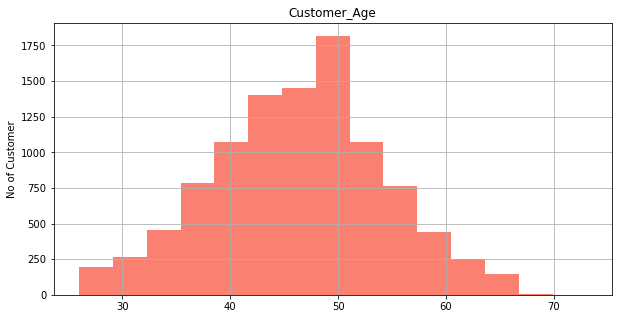

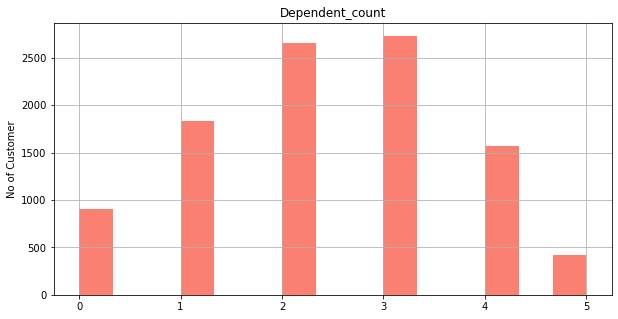

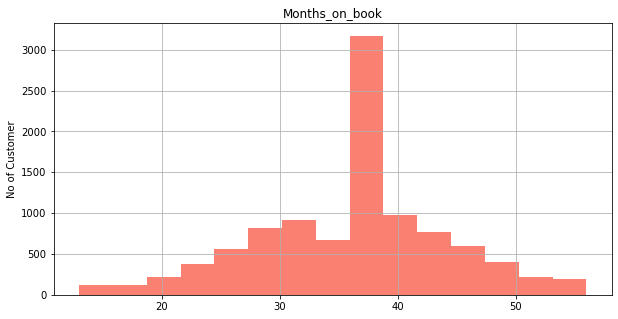

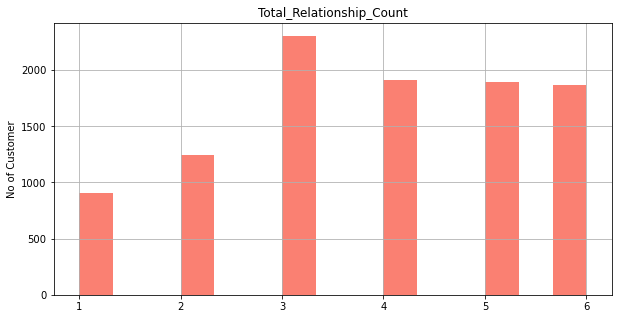

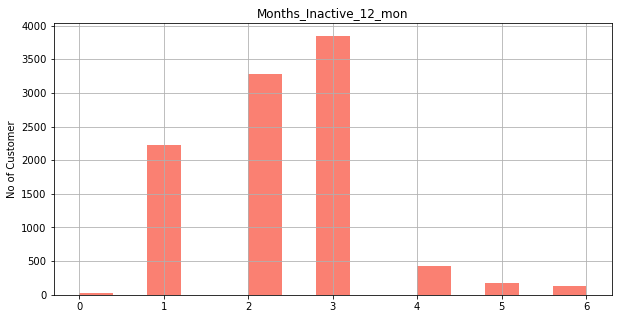

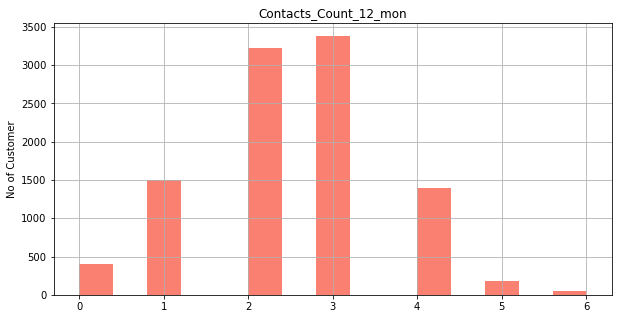

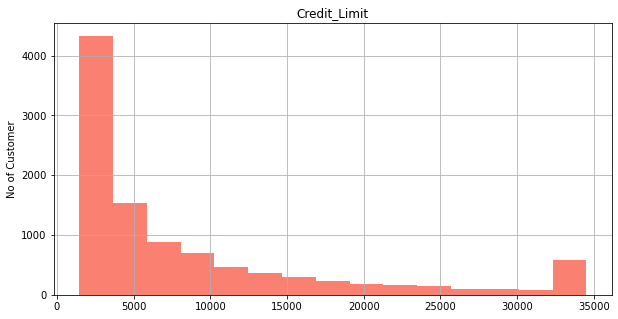

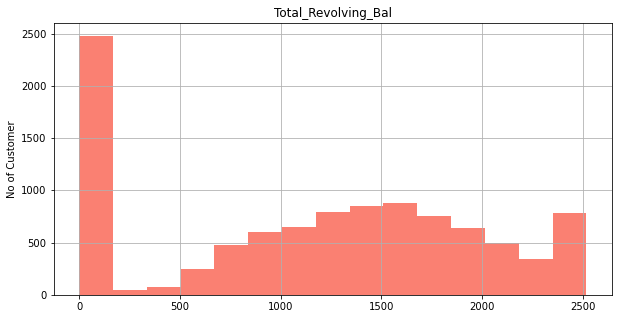

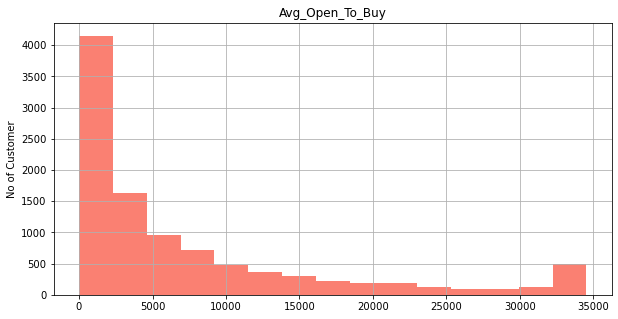

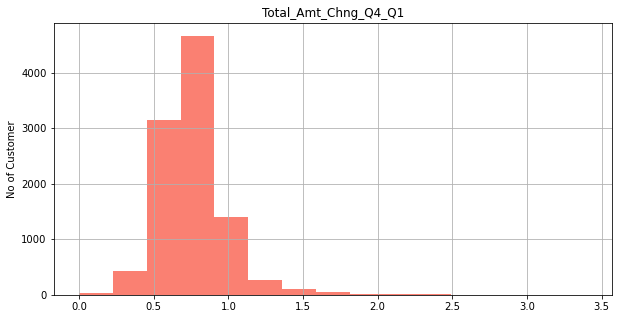

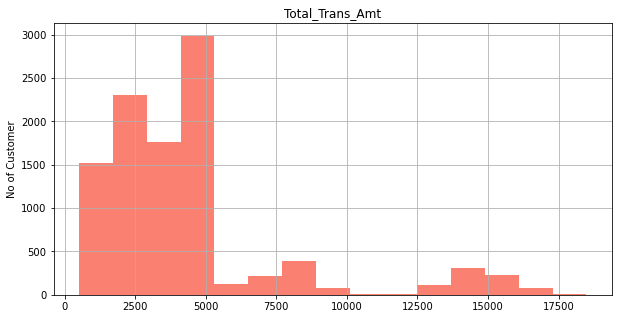

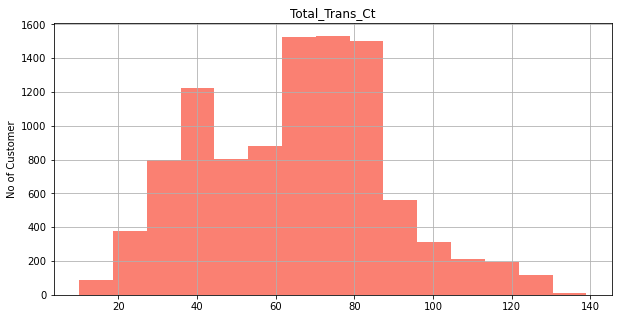

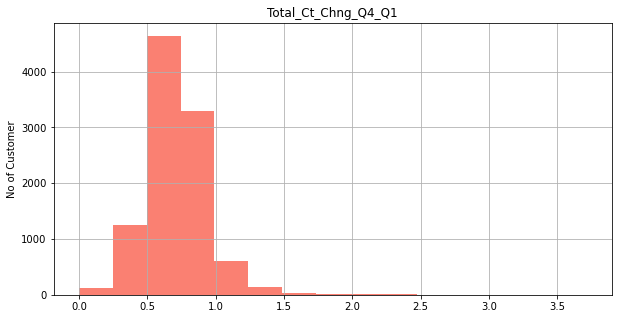

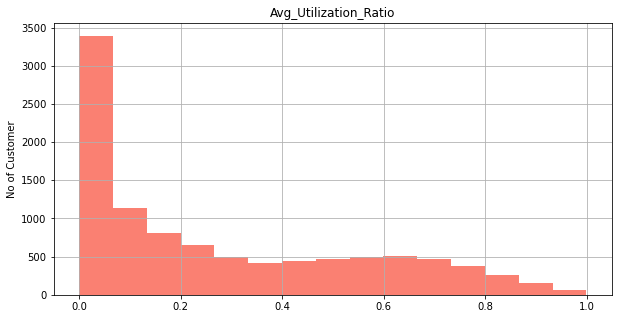

In [68]:
for i in ds_num.columns:
    plt.subplots(figsize = (10,5))
    plt.hist(ds_num[i], color = 'salmon', bins = 15)
    plt.title(i)
    plt.grid()
    plt.ylabel('No of Customer')
    plt.show()

In [79]:
print('Oldest Customer: ', ds.Customer_Age.max())
print('Youngest Customer: ', ds.Customer_Age.min())
print('Lowest Months On Book: ', ds.Months_on_book.min())
print('Longest Months On Book: ', ds.Months_on_book.max())

Oldest Customer:  73
Youngest Customer:  26
Lowest Months On Book:  13
Longest Months On Book:  56


### 1) The customer age histogram is symmetrical and unimodal. The peak of the histogram lies at 50 years which means most of the customer age is around 50 years old. The youngest customer age is 26 years old while the oldest customer age is 73 years old.

### 2) The months on book histogram issymmetrical and unimodal. The peak of the histogram lies at 36 months which means most of the customer in on book for 36 months. The shortest months customer on book is 13 months while the longest months customer on book is 56 months.

## Visualize categorical data

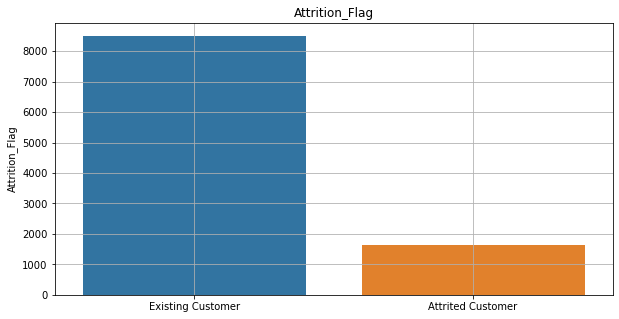

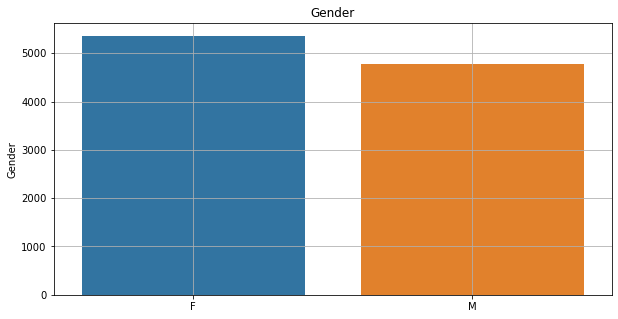

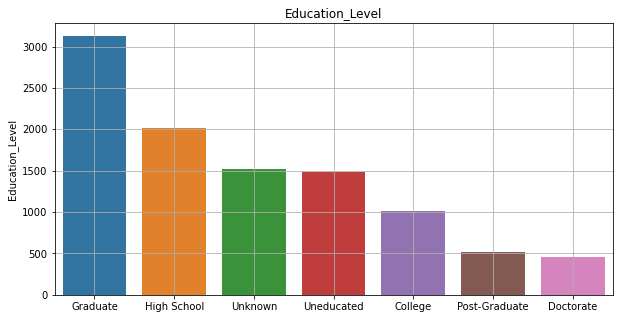

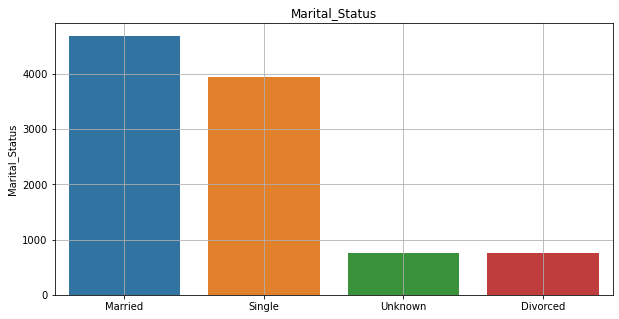

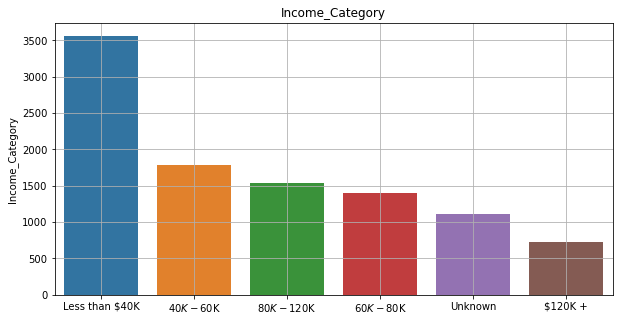

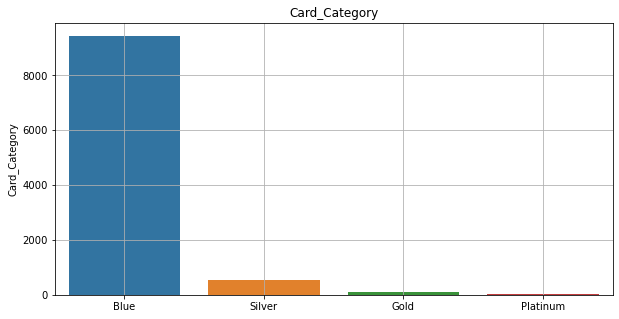

In [80]:
for i in ds_cat.columns:
    plt.subplots(figsize = (10,5))
    sns.barplot(ds_cat[i].value_counts().index, ds_cat[i].value_counts()).set_title (i)
    plt.grid()
    plt.show()

### 1) Most of the credit card customer is a graduated education level.
### 2) Most of the credit card customer has income less than 40k usd

## Visualizing numerical data with output

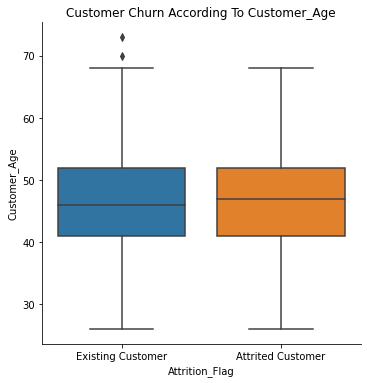

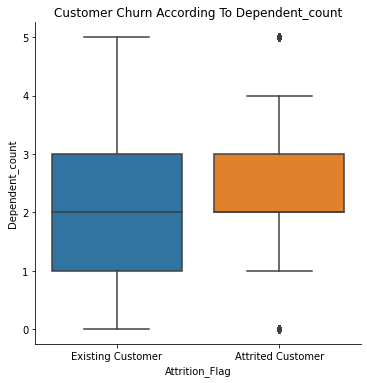

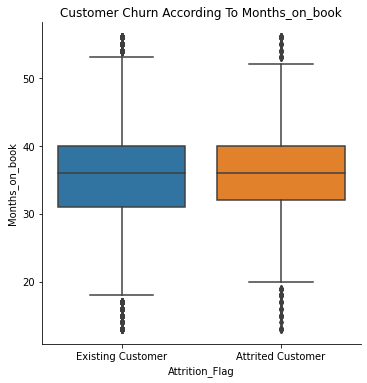

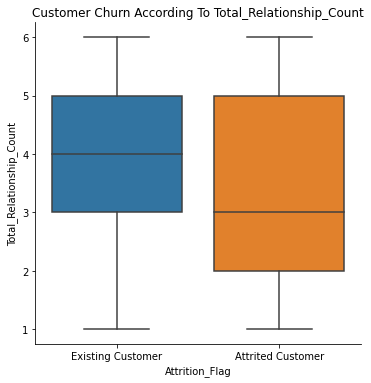

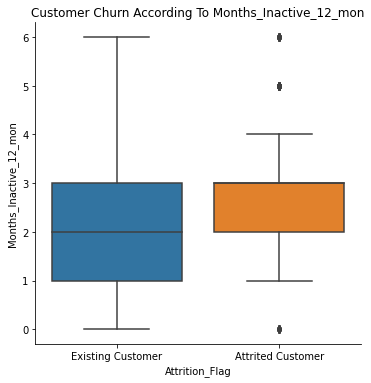

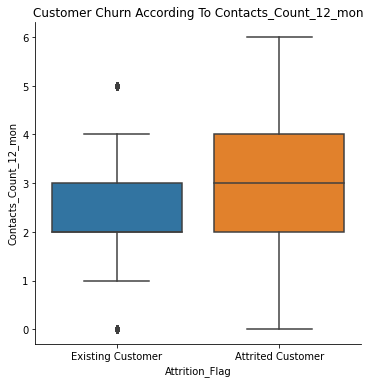

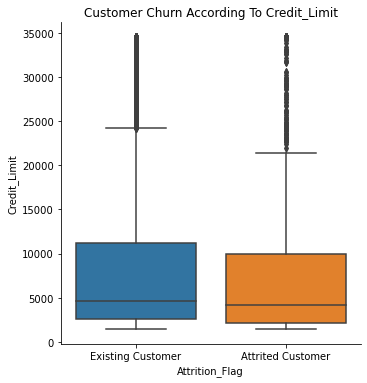

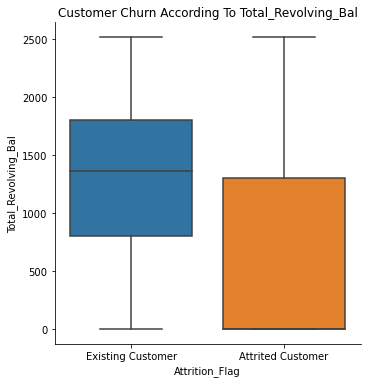

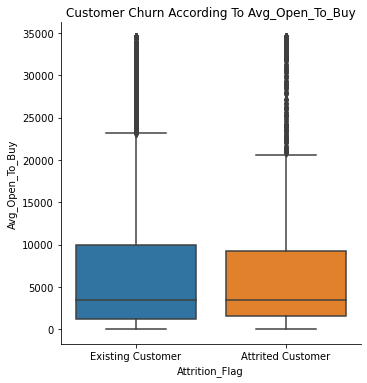

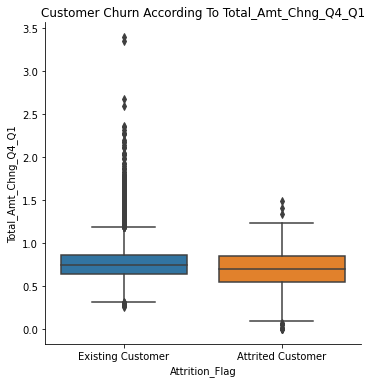

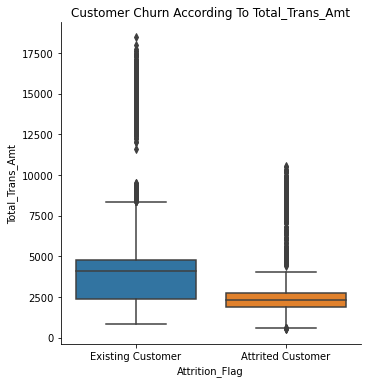

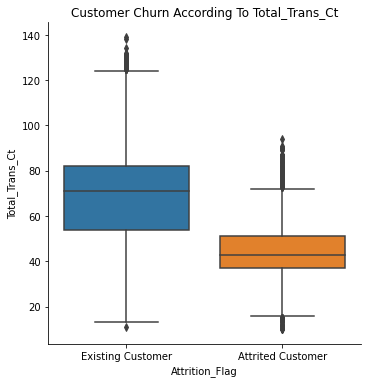

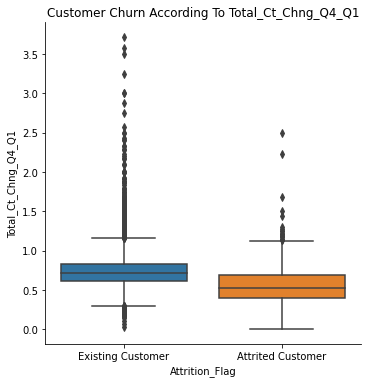

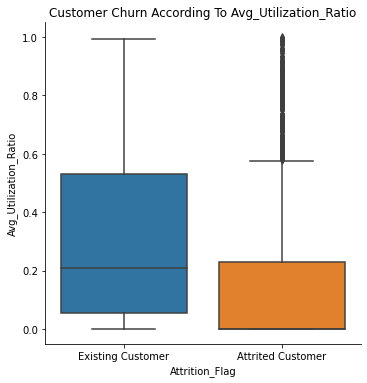

In [10]:
for i in ds_num.columns:
    sns.catplot(x='Attrition_Flag', y =ds_num[i], data = ds, kind = 'box')
    plt.title(f'Customer Churn According To {i}')

### 1) We notice a major difference when analyzing the revolving balance of the customers credit lines. More than half of the churned customers have paid off all their debt. It is unclear whether this measure for the revolving balance is conducted before or after the termination of the credit line and whether customers who cancel their credit cards are asked to pay off all their standing debt.
### 2) Most of credit card customer that has total amount of transactions made in the last year higher than 2500 usd and the number of transactions made in the last year higher than 50 transactions has lower probability to churn. Churned customers used their credit card less often and spent significantly less money. 

## Visualizing categorical data with output

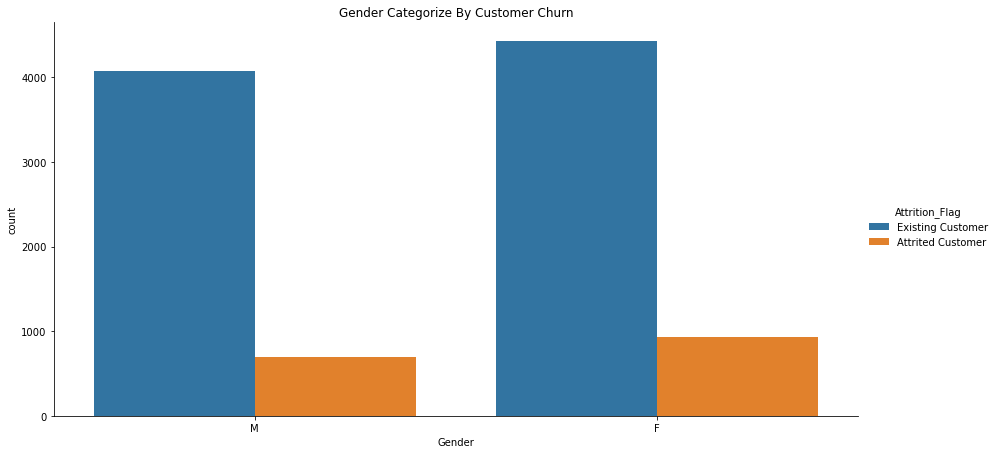

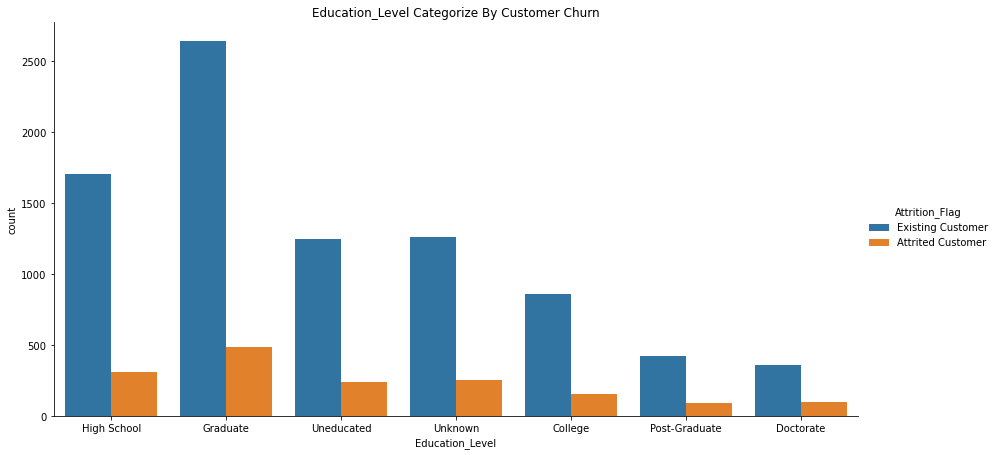

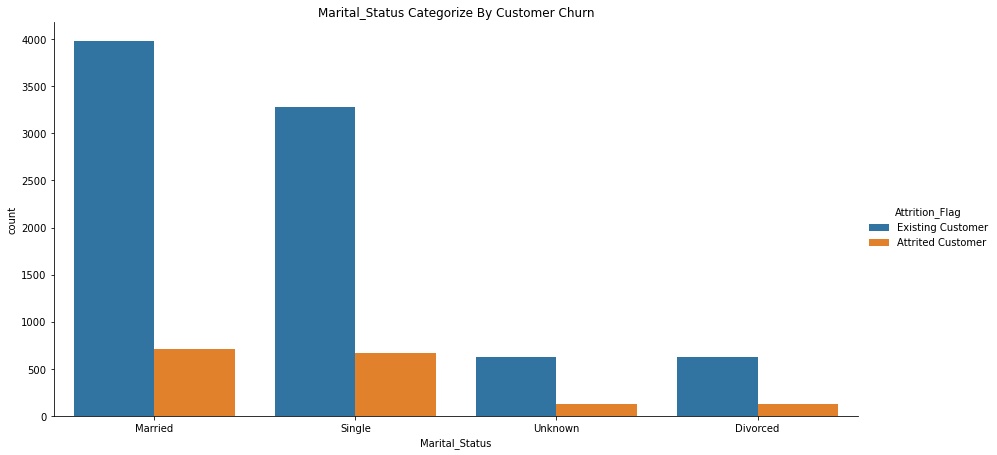

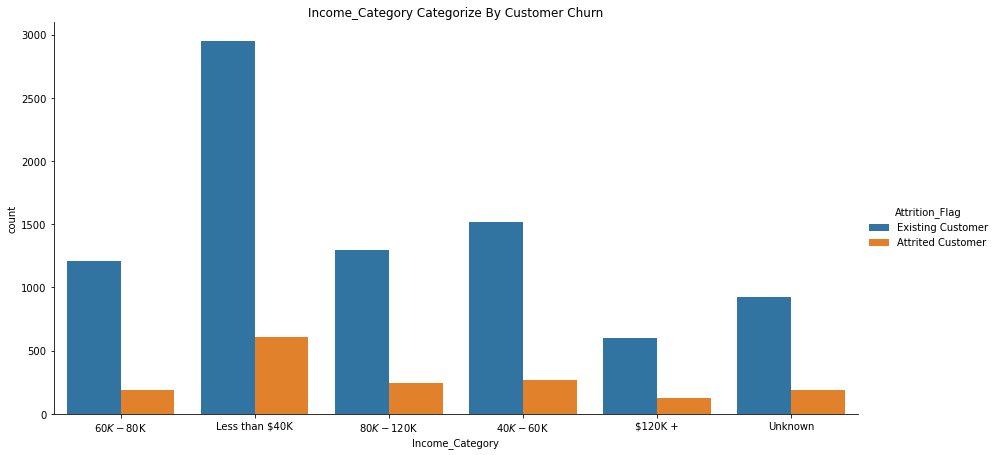

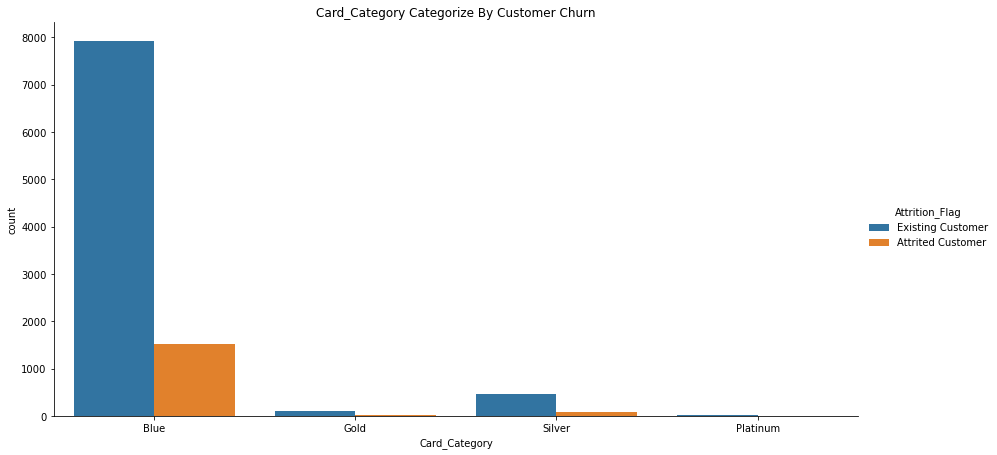

In [11]:
for i in ds_cat.columns[1:]:
    sns.catplot(x = i, data = ds, kind = 'count', hue = 'Attrition_Flag', aspect = 2, height = 6)
    plt.title(f'{i} Categorize By Customer Churn')
    

## Preparing data for machine learning

In [12]:
X = ds.iloc[:,1:].values
y = ds.iloc[:,0].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
X_train[:,1] = le.fit_transform(X_train[:,1])
X_test[:,1] = le.fit_transform(X_test[:,1])

In [15]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3, 4, 5, 6])], remainder = 'passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Machine learning
## Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

classifierNB = GaussianNB()
classifierNB = classifierNB.fit(X_train,y_train)
y_pred = classifierNB.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

cmNB = confusion_matrix(y_test, y_pred)
print(cmNB)

[[ 198  111]
 [ 144 1573]]


In [19]:
from sklearn.metrics import accuracy_score
ACC_NB = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_NB)
model_acc={}
model_acc['Naive Bayes'] = ACC_NB

The accurancy score is  87.41362290227048


## Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression

classifierLR = LogisticRegression(random_state=0)
classifierLR.fit(X_train,y_train)
y_pred = classifierLR.predict(X_test)

In [21]:
cmLR = confusion_matrix(y_test, y_pred)
print(cmLR)

[[ 185  124]
 [  71 1646]]


In [22]:
ACC_LR = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_LR)
model_acc['Logistic Regression'] = ACC_LR

The accurancy score is  90.37512339585389


## K Nearest Neighbours

In [23]:
from sklearn.neighbors import KNeighborsClassifier

classifierKNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifierKNN.fit(X_train,y_train)
y_pred=classifierKNN.predict(X_test)

In [24]:
cmKNN = confusion_matrix(y_test,y_pred)
print(cmKNN)

[[  93  216]
 [  38 1679]]


In [25]:
ACC_KNN = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_KNN)
model_acc['K Nearest Neighbour'] = ACC_KNN

The accurancy score is  87.4629812438302


## Support Vector Machine

In [26]:
from sklearn.svm import SVC

classifierSVC = SVC(kernel='linear', random_state=0) #kernel can be changed to increase accurancy
classifierSVC.fit(X_train,y_train)
y_pred = classifierSVC.predict(X_test)

In [27]:
cmSVC = confusion_matrix(y_test,y_pred)
print(cmSVC)

[[ 185  124]
 [  67 1650]]


In [28]:
ACC_SVC = accuracy_score(y_test, y_pred)*100
print('The accuracy score is ', ACC_SVC)
model_acc['Support Vector Machine'] = ACC_SVC

The accuracy score is  90.57255676209279


## Desicion Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

classifierDT = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifierDT.fit(X_train, y_train)
y_pred = classifierDT.predict(X_test)

In [30]:
cmDT = confusion_matrix(y_test, y_pred)
print(cmDT)

[[ 241   68]
 [  54 1663]]


In [31]:
ACC_DT = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_DT)
model_acc['Decision Tree'] = ACC_DT

The accurancy score is  93.97828232971372


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

classifierRFC = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state=0)
classifierRFC.fit(X_train, y_train)
y_pred = classifierRFC.predict(X_test)

In [33]:
cmRFC = confusion_matrix(y_test,y_pred)
print(cmRFC)

[[ 236   73]
 [  27 1690]]


In [34]:
ACC_RFC = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_RFC)
model_acc['Random Forest Classification'] = ACC_RFC

The accurancy score is  95.06416584402764


## XGBoost

In [35]:
import xgboost as xgb

clf= xgb.XGBClassifier(max_depth=7, n_estimators=100, colsample_bytree=0.8, subsample=0.8, learning_rate=0.09)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[20:25:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
cmXG = confusion_matrix(y_test,y_pred)
print(cmXG)

[[ 270   39]
 [  14 1703]]


In [37]:
ACC_XG = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_XG)
model_acc['XGBoost'] = ACC_XG

The accurancy score is  97.38400789733464


## Artificial Neural Network

In [60]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=5, activation='relu')) #input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=5, activation='relu')) #second hidden layer
ann.add(tf.keras.layers.Dense(units=5, activation='relu')) #third hidden layer
ann.add(tf.keras.layers.Dense(units=5, activation='relu')) #fourth hidden layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #output layer

In [61]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
254/254 [==============================] - 3s 5ms/step - loss: 0.4891 - accuracy: 0.8311
Epoch 2/100
254/254 [==============================] - 1s 5ms/step - loss: 0.3832 - accuracy: 0.8373
Epoch 3/100
254/254 [==============================] - 1s 5ms/step - loss: 0.3249 - accuracy: 0.8688
Epoch 4/100
254/254 [==============================] - 1s 5ms/step - loss: 0.2826 - accuracy: 0.8929
Epoch 5/100
254/254 [==============================] - 1s 5ms/step - loss: 0.2663 - accuracy: 0.8990
Epoch 6/100
254/254 [==============================] - 1s 5ms/step - loss: 0.2568 - accuracy: 0.9005
Epoch 7/100
254/254 [==============================] - 1s 5ms/step - loss: 0.2492 - accuracy: 0.9026
Epoch 8/100
254/254 [==============================] - 1s 5ms/step - loss: 0.2425 - accuracy: 0.9031
Epoch 9/100
254/254 [==============================] - 1s 5ms/step - loss: 0.2362 - accuracy: 0.9046
Epoch 10/100
254/254 [==============================] - 1s 5ms/step - loss: 0.2310 - accura

254/254 [==============================] - 1s 5ms/step - loss: 0.1427 - accuracy: 0.9425
Epoch 81/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1416 - accuracy: 0.9430
Epoch 82/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1414 - accuracy: 0.9435
Epoch 83/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1414 - accuracy: 0.9431
Epoch 84/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1413 - accuracy: 0.9420
Epoch 85/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1412 - accuracy: 0.9431
Epoch 86/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1403 - accuracy: 0.9440
Epoch 87/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1409 - accuracy: 0.9426
Epoch 88/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1390 - accuracy: 0.9451
Epoch 89/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1393 - accuracy: 

In [62]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[1, 1],
       [0, 0],
       [1, 1],
       ...,
       [1, 0],
       [1, 1],
       [1, 1]])

In [63]:
cmAnn = confusion_matrix(y_test, y_pred)
print(cmAnn)

[[ 239   70]
 [  66 1651]]


In [64]:
ACC_Ann = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_Ann)
model_acc['Artificial Neural Network'] = ACC_Ann

The accurancy score is  93.2872655478776


## Accurancy summary of all model

In [65]:
model_ds = pd.DataFrame.from_dict(model_acc,orient = 'index',columns = ['Accuracy Score'])
model_ds = model_ds.sort_values(by ='Accuracy Score',ascending = False)
model_ds

,Accuracy Score
XGBoost,97.384008
Random Forest Classification,95.064166
Decision Tree,93.978282
Artificial Neural Network,93.287266
Support Vector Machine,90.572557
Logistic Regression,90.375123
K Nearest Neighbour,87.462981
Naive Bayes,87.413623


Text(0.5, 1.0, 'Credit Card Churn Model Accuracy Score')

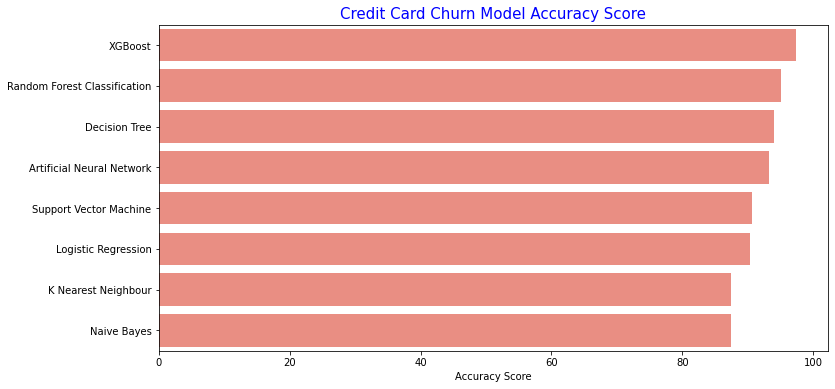

In [66]:
gig,ax = plt.subplots(figsize = (12,6))
sns.barplot(x="Accuracy Score", y=model_ds.index, data=model_ds,color = 'salmon')
plt.title('Credit Card Churn Model Accuracy Score', fontsize=15, color="blue")

### For conclusion, XGBoost model have the highest accuracy than other model which is 97.384%. Other model approach does not perform as good as XGB which is the second highest accuracy is Random Forest with 95%. But from the confusion matrix score, the data have high bias towards existing customer. We need more data from customer that has churn to get the complexity of the model.